In [6]:
from TransportModel import TransportModel
from Agents import StepType
import pandas as pd
import statistics
import mesa

import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [95]:

params = {'num_cars': range(1,3),
          'width' : 10,
          'height' : 10,
          'multi_pass' : False,
          'seed_int': 127,
          'strategy' : [StepType.QUEUE]}

results = mesa.batch_run(
    TransportModel,
    parameters=params,
    iterations=5,
    max_steps=1000,
    number_processes=1,
    data_collection_period=1,
    display_progress=True,
)

 40%|████      | 4/10 [00:00<00:00, 20.11it/s]

Agent 1: Location(x=0, y=9) to Location(x=9, y=9)
NEXT Location(x=0, y=9)
NEXT Location(x=0, y=9)
NEXT Location(x=0, y=9)
NEXT Location(x=0, y=9)
NEXT Location(x=0, y=9)
Agent 3: Location(x=0, y=4) to Location(x=3, y=6)
NEXT Location(x=0, y=9)
NEXT Location(x=0, y=9)
NEXT Location(x=0, y=9)
NEXT Location(x=0, y=9)
NEXT Location(x=0, y=9)
Agent 4: Location(x=3, y=4) to Location(x=4, y=6)
NEXT Location(x=0, y=9)
Destination Reached
NUM PASSENGERS:  1
NEXT Location(x=9, y=9)
Waited too long - passenger 3 has left
NEXT Location(x=9, y=9)
NEXT Location(x=9, y=9)
NEXT Location(x=9, y=9)
Agent 6: Location(x=0, y=5) to Location(x=4, y=8)
NEXT Location(x=9, y=9)
NEXT Location(x=9, y=9)
NEXT Location(x=9, y=9)
NEXT Location(x=9, y=9)
NEXT Location(x=9, y=9)
Destination Reached
AA
AA
AA
Waiting for new client
Agent 7: Location(x=1, y=6) to Location(x=1, y=1)
AA
NEXT Location(x=9, y=9)
Destination Reached
Waiting for new client
NEXT Location(x=9, y=9)
Destination Reached
Waiting for new client
NEX

AttributeError: 'NoneType' object has no attribute 'x'

In [96]:
results_df = pd.DataFrame(results)
print(results_df.keys())


Index(['RunId', 'iteration', 'Step', 'num_cars', 'width', 'height',
       'multi_pass', 'seed_int', 'strategy', 'Manhattan', 'AgentID', 'Steps',
       'WaitingTime'],
      dtype='object')


,num_cars,WaitingTime
0,1,9.844920
1,2,7.138028


<AxesSubplot: xlabel='num_cars'>

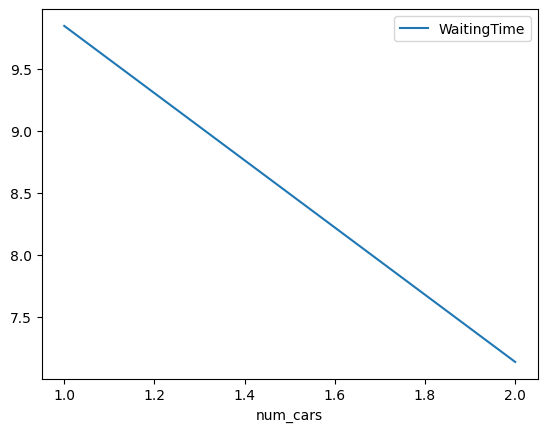

In [120]:

results_df = results_df.dropna(subset="WaitingTime")
results_df = results_df[results_df.WaitingTime != -1]

av_waiting = results_df.groupby('num_cars')['WaitingTime'].mean().reset_index()

av_waiting_df = pd.DataFrame(av_waiting)
display(av_waiting_df)

av_waiting_df.plot(x='num_cars', y='WaitingTime')
            